In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
from PIL import Image
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Datasets/fer_images.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

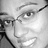

In [ ]:
tf.keras.preprocessing.image.load_img("/content/fer2013/train/Happy/1000.jpg")

## Base de treinamento e teste

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)

dataset_treinamento = gerador_treinamento.flow_from_directory('/content/fer2013/train',
                                                           target_size=(48, 48),
                                                           batch_size=16,
                                                           class_mode='categorical',
                                                           shuffle = True)

Found 28709 images belonging to 7 classes.


In [ ]:
dataset_treinamento.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

<Axes: ylabel='count'>

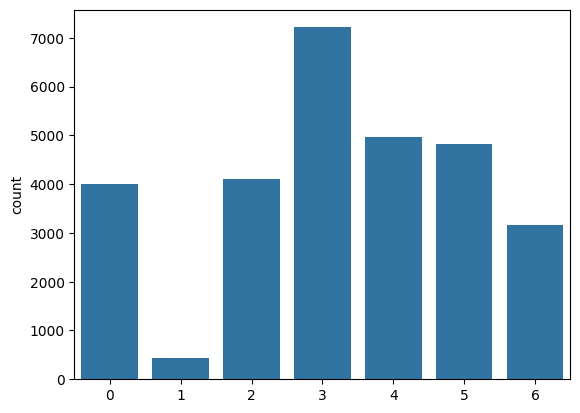

In [ ]:
sns.countplot(x = dataset_treinamento.classes)

In [ ]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/fer2013/validation',
                                                  target_size = (64,64),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 3589 images belonging to 7 classes.


## Construção e treinamento da rede neural

In [ ]:
numero_detectores = 32 #n° filtros da rede
numero_classes = 7
largura, altura = 48, 48
epocas = 70

network = Sequential()

network.add(Conv2D(filters = numero_detectores, kernel_size = (3,3), activation = 'relu', padding='same', input_shape = (largura, altura, 3)))
network.add(BatchNormalization())
network.add(Conv2D(filters = numero_detectores, kernel_size = (3,3), activation = 'relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters = 2*numero_detectores, kernel_size = (3,3), activation = 'relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters = 2*numero_detectores, kernel_size = (3,3), activation = 'relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters = 2*2*numero_detectores, kernel_size = (3,3), activation = 'relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters = 2*2*numero_detectores, kernel_size = (3,3), activation = 'relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters = 2*2*2*numero_detectores, kernel_size = (3,3), activation = 'relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters = 2*2*2*numero_detectores, kernel_size = (3,3), activation = 'relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size = (2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(units =2* numero_detectores, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(units = 2*numero_detectores, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(units = numero_classes, activation = 'softmax'))

print(network.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,328,743 (5.07 MB)

 Trainable params: 1,326,567 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

None


In [ ]:
network.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
network.fit(dataset_treinamento, epochs = epocas)

Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1795/1795 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - accuracy: 0.2115 - loss: 2.0632
Epoch 2/70
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 62s 27ms/step - accuracy: 0.3595 - loss: 1.6266
Epoch 3/70
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 49s 27ms/step - accuracy: 0.4541 - loss: 1.4239
Epoch 4/70
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 49s 27ms/step - accuracy: 0.4824 - loss: 1.3520
Epoch 5/70
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.5173 - loss: 1.2795
Epoch 6/70
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.5346 - loss: 1.2374
Epoch 7/70
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - accuracy: 0.5490 - loss: 1.2011
Epoch 8/70
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.5649 - loss: 1.1648
Epoch 9/70
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.5738 - loss: 1.1457
Epoch 10/70
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - accuracy: 0.5910 - loss: 1.1032
Epoch 11/70
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.5928 - loss: 1.0933
Epoch 12/70
1795/17

In [ ]:
model_json = network.to_json()
with open("network_emotions.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights_emotions.hdf5')

In [ ]:
with open('network_emotions.json', 'r') as json_file:
    json_saved_model = json_file.read()

json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initialize

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/weights_emotions.hdf5')
network_loaded.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
network_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,328,743 (5.07 MB)

 Trainable params: 1,326,567 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

## Avaliação da rede neural

In [ ]:
previsoes = network.predict(dataset_teste)
previsoes

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 2304, but received input with shape (1, 4096)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 64, 64, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
imagem = cv2.imread('/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Images/gabriel.png')

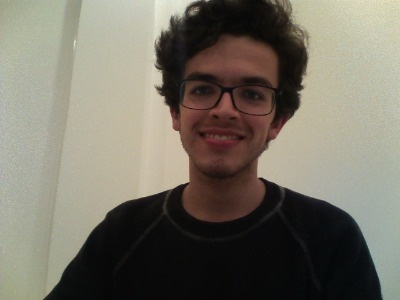

In [ ]:
cv2_imshow(imagem)

In [ ]:
detector_face = cv2.CascadeClassifier("/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Cascades/haarcascade_frontalface_default.xml")

In [ ]:
imagem_original = imagem.copy()
deteccoes = detector_face.detectMultiScale(imagem_original)

In [ ]:
deteccoes

array([[162,  40, 128, 128]], dtype=int32)

array([[[ 34,  38,  43],
        [ 32,  36,  41],
        [ 21,  27,  32],
        ...,
        [ 18,  24,  29],
        [ 20,  29,  33],
        [ 25,  34,  38]],

       [[ 29,  33,  38],
        [ 27,  31,  36],
        [ 18,  24,  29],
        ...,
        [ 17,  23,  28],
        [ 15,  24,  28],
        [ 20,  29,  33]],

       [[ 26,  30,  35],
        [ 28,  32,  37],
        [ 25,  29,  34],
        ...,
        [ 16,  22,  27],
        [ 13,  22,  25],
        [ 17,  26,  29]],

       ...,

       [[159, 183, 195],
        [160, 184, 196],
        [161, 185, 197],
        ...,
        [161, 180, 187],
        [162, 181, 188],
        [162, 181, 188]],

       [[159, 183, 195],
        [160, 184, 196],
        [161, 185, 197],
        ...,
        [160, 179, 186],
        [162, 181, 188],
        [161, 180, 187]],

       [[159, 183, 195],
        [160, 184, 196],
        [162, 186, 198],
        ...,
        [161, 180, 187],
        [162, 181, 188],
        [161, 180, 187]]], dtype=uint8)
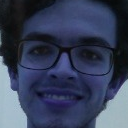

In [ ]:
roi = imagem_original[40:40 + 128, 162:162+128]
roi

array([[[ 43,  38,  34],
        [ 41,  36,  32],
        [ 32,  27,  21],
        ...,
        [ 29,  24,  18],
        [ 33,  29,  20],
        [ 38,  34,  25]],

       [[ 38,  33,  29],
        [ 36,  31,  27],
        [ 29,  24,  18],
        ...,
        [ 28,  23,  17],
        [ 28,  24,  15],
        [ 33,  29,  20]],

       [[ 35,  30,  26],
        [ 37,  32,  28],
        [ 34,  29,  25],
        ...,
        [ 27,  22,  16],
        [ 25,  22,  13],
        [ 29,  26,  17]],

       ...,

       [[195, 183, 159],
        [196, 184, 160],
        [197, 185, 161],
        ...,
        [187, 180, 161],
        [188, 181, 162],
        [188, 181, 162]],

       [[195, 183, 159],
        [196, 184, 160],
        [197, 185, 161],
        ...,
        [186, 179, 160],
        [188, 181, 162],
        [187, 180, 161]],

       [[195, 183, 159],
        [196, 184, 160],
        [198, 186, 162],
        ...,
        [187, 180, 161],
        [188, 181, 162],
        [187, 180, 161]]], dtype=uint8)
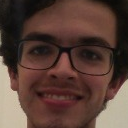

In [ ]:
# Converter roi para RGB
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
roi

array([[[ 37,  32,  28],
        [ 34,  28,  22],
        [ 42,  37,  33],
        ...,
        [ 17,  16,  12],
        [ 25,  21,  16],
        [ 30,  25,  16]],

       [[ 36,  31,  27],
        [ 41,  36,  31],
        [ 41,  36,  32],
        ...,
        [ 19,  16,  11],
        [ 24,  19,  13],
        [ 28,  25,  17]],

       [[ 36,  31,  27],
        [ 39,  34,  30],
        [ 35,  30,  26],
        ...,
        [ 20,  17,  12],
        [ 25,  20,  14],
        [ 27,  25,  20]],

       ...,

       [[197, 185, 162],
        [200, 188, 166],
        [200, 188, 166],
        ...,
        [188, 181, 162],
        [188, 182, 162],
        [187, 180, 161]],

       [[196, 184, 160],
        [199, 187, 165],
        [200, 188, 166],
        ...,
        [187, 180, 161],
        [187, 181, 162],
        [187, 180, 161]],

       [[196, 184, 160],
        [199, 187, 163],
        [199, 187, 165],
        ...,
        [186, 179, 160],
        [187, 180, 161],
        [188, 181, 162]]], dtype=uint8)
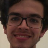

In [ ]:
roi = cv2.resize(roi, (48,48))
roi

In [ ]:
roi.shape

(48, 48, 3)

In [ ]:
roi = roi / 255
roi

array([[[0.14509804, 0.1254902 , 0.10980392],
        [0.13333333, 0.10980392, 0.08627451],
        [0.16470588, 0.14509804, 0.12941176],
        ...,
        [0.06666667, 0.0627451 , 0.04705882],
        [0.09803922, 0.08235294, 0.0627451 ],
        [0.11764706, 0.09803922, 0.0627451 ]],

       [[0.14117647, 0.12156863, 0.10588235],
        [0.16078431, 0.14117647, 0.12156863],
        [0.16078431, 0.14117647, 0.1254902 ],
        ...,
        [0.0745098 , 0.0627451 , 0.04313725],
        [0.09411765, 0.0745098 , 0.05098039],
        [0.10980392, 0.09803922, 0.06666667]],

       [[0.14117647, 0.12156863, 0.10588235],
        [0.15294118, 0.13333333, 0.11764706],
        [0.1372549 , 0.11764706, 0.10196078],
        ...,
        [0.07843137, 0.06666667, 0.04705882],
        [0.09803922, 0.07843137, 0.05490196],
        [0.10588235, 0.09803922, 0.07843137]],

       ...,

       [[0.77254902, 0.7254902 , 0.63529412],
        [0.78431373, 0.7372549 , 0.65098039],
        [0.78431373, 0

In [ ]:
roi = np.expand_dims(roi, axis = 0)
roi.shape

(1, 48, 48, 3)

In [ ]:
probs = network.predict(roi)
probs

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[8.7333363e-05, 4.4629891e-07, 8.3689287e-04, 8.8354909e-01,
        1.1360743e-01, 1.3402096e-03, 5.7852099e-04]], dtype=float32)

In [ ]:
previsao = np.argmax(probs)
previsao

3

In [ ]:
dataset_teste.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

## Classificação de múltiplas imagens

In [80]:
imagem = cv2.imread('/content/drive/MyDrive/COMPUTER-VISION/emotionsdaniel.png')

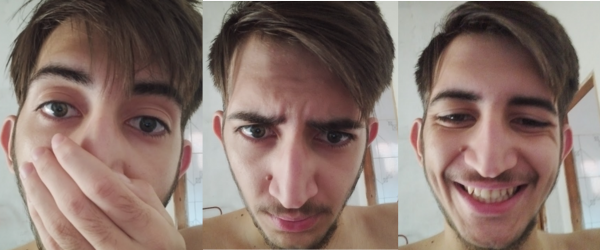

In [81]:
cv2_imshow(imagem)

In [82]:
deteccoes = detector_face.detectMultiScale(imagem, scaleFactor = 1.1, minNeighbors = 5)
deteccoes

array([[ 20,  41,  87,  87],
       [396,  42, 192, 192],
       [205,  69, 176, 176]], dtype=int32)

In [83]:
dataset_teste.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [84]:
emotions = ['Raiva', 'Nojo', 'Medo', 'Feliz', 'Neutro', 'Triste', 'Surpreso']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


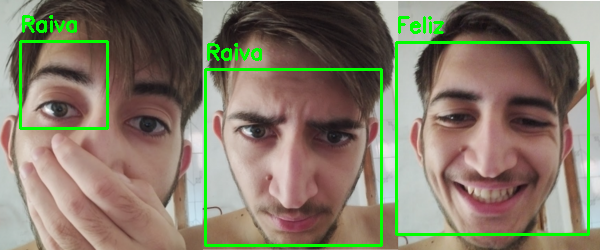

In [85]:
for (x, y, l, a) in deteccoes:
  cv2.rectangle(imagem, (x,y), (x+l, y+a), (0,255,0), 2)
  roi = imagem[y:y+a, x:x+l]
  roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
  roi = cv2.resize(roi, (48,48))
  roi = np.expand_dims(roi, axis = 0)
  roi = roi / 255

  previsao = network.predict(roi)
  previsao = np.argmax(previsao)

  cv2.putText(imagem, emotions[previsao], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

cv2_imshow(imagem)
